測試能否確實應用策略 <br/>
現金跟股票放為兩倍

In [2]:
from keras.models import Sequential, load_model 
from keras.layers.core import Dense, Dropout, Flatten, Activation 
from sklearn import preprocessing
import csv
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


兩位受試者的策略均為：<br/>
If Dprice>0, P1Decision is S <br/>
If Dprice<0, P1Decision is N <br/>
If Dprice=0, P1Decision is B 

輸入資料 <br/>
X 輸入 Dprice 作為預測的變項<br/>
Y 輸入 P1Decision 作為被預測的變項<br/>

In [3]:
with open('Hedge_Hedge.csv', newline = '') as csvfile:
    data = pd.read_csv(csvfile)
X = data.loc[:,'Dprice']
X = X[1:100]
X = preprocessing.scale(X)

Y = data.loc[:,'P1Decision']
Y = Y[1:100]
#以one-hot encoding將 Decision 轉為數值(1 0 0)呈現
Y_dum = pd.get_dummies(Y)

建立並訓練model <br/>
input只輸入Dprice, hidden layer設置50個nodes <br/>
將data其中的20%作為testing data

In [4]:
#固定每次random跑出的結果以利解釋
np.random.seed(408)
#建構 model
model = Sequential()
model.add(Dense(50, input_dim = 1, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

test = model.fit(X,Y_dum, epochs = 50, batch_size = 50, validation_split = 0.2, shuffle = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________
Train on 79 samples, validate on 20 samples
Epoch 1/50
79/79 [==============================] - 0s 6ms/step - loss: 1.1610 - accuracy: 0.3291 - val_loss: 1.1541 - val_accuracy: 0.3500
Epoch 2/50
79/79 [==============================] - 0s 101us/step - loss: 1.1516 - accuracy: 0.3291 - val_loss: 1.1456 - val_accuracy: 0.3500
Epoch 3/50
79/79 [==============================] - 0s 101us/step - loss: 1.1422 - accuracy: 0.3291 - val_loss: 1.1374 - val_accuracy: 0.3500
Epoch 4/50
79/79 [==============================] 

以圖表的方式呈現model訓練以及測試的效果

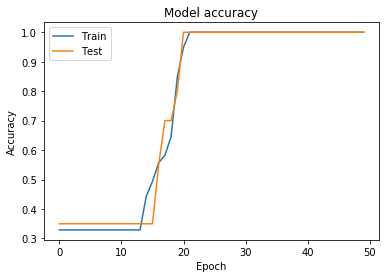

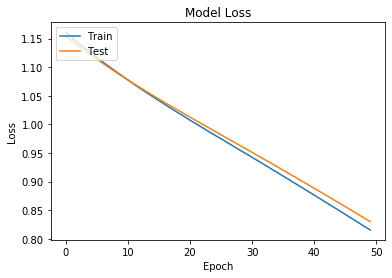

In [5]:
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(test.history['loss'])
plt.plot(test.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()